# Installing and importing libraries:

In [7]:
!pip install pandas

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Reading the data with multiple encodings

In [8]:
encodings = ['utf-8', 'latin1', 'iso-8859-1']

for encoding in encodings:
    try:
        df = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/training_set_rel3.tsv', 
                         sep='\t', 
                         encoding=encoding, 
                         on_bad_lines='skip')
        print(f"Đọc dữ liệu thành công với mã hóa {encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"Lỗi mã hóa với {encoding}: {e}")
    except pd.errors.ParserError as e:
        print(f"Lỗi phân tích cú pháp với {encoding}: {e}")

# Nếu vẫn không thành công, thử bỏ qua các ký tự không thể giải mã
if 'df' not in locals():
    try:
        df = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/training_set_rel3.tsv', 
                         sep='\t', 
                         encoding='cp1252', 
                         errors='ignore', 
                         on_bad_lines='skip')
        print("Đọc dữ liệu thành công với mã hóa cp1252 và bỏ qua các ký tự không thể giải mã")
    except UnicodeDecodeError as e:
        print(f"Lỗi mã hóa: {e}")
    except pd.errors.ParserError as e:
        print(f"Lỗi phân tích cú pháp: {e}")

Lỗi mã hóa với utf-8: 'utf-8' codec can't decode byte 0x92 in position 80: invalid start byte
Đọc dữ liệu thành công với mã hóa latin1


# Initial data exploration and cleaning

In [9]:
df.info()
df.head(10)
df = df.dropna(axis=1)
df.info()
df.head(20000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8
...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,35
12972,21628,8,I never understood the meaning laughter is th...,15,17,32
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40
12974,21630,8,Trippin' on fen...,20,20,40


# Assign Prompts to Essays

In [20]:
prompt = [
    """More and more people use computers, but not everyone agrees that this benefits society. Those who support advances in technology believe that computers have a positive effect on people. They teach hand-eye coordination, give people the ability to learn about faraway places and people, and even allow people to talk online with other people. Others have different ideas. Some experts are concerned that people are spending too much time on their computers and less time exercising, enjoying nature, and interacting with family and friends. 

Write a letter to your local newspaper in which you state your opinion on the effects computers have on people. Persuade the readers to agree with you.
""",
    """Censorship in the Libraries
"All of us can think of a book that we hope none of our children or any other children have taken off the shelf. But if I have the right to remove that book from the shelf -- that work I abhor -- then you also have exactly the same right and so does everyone else. And then we have no books left on the shelf for any of us." --Katherine Paterson, Author
Write a persuasive essay to a newspaper reflecting your vies on censorship in libraries. Do you believe that certain materials, such as books, music, movies, magazines, etc., should be removed from the shelves if they are found offensive? Support your position with convincing arguments from your own experience, observations, and/or reading.
""",
    """ROUGH ROAD AHEAD: Do Not Exceed Posted Speed Limit
by Joe Kurmaskie
FORGET THAT OLD SAYING ABOUT NEVER taking candy from strangers. No, a better piece of advice for the solo cyclist would be, “Never accept travel advice from a collection of old-timers who haven’t left the confines of their porches since Carter was in office.” It’s not that a group of old guys doesn’t know the terrain. With age comes wisdom and all that, but the world is a fluid place. Things change. 
At a reservoir campground outside of Lodi, California, I enjoyed the serenity of an early-summer evening and some lively conversation with these old codgers. What I shouldn’t have done was let them have a peek at my map. Like a foolish youth, the next morning I followed their advice and launched out at first light along a “shortcut” that was to slice away hours from my ride to Yosemite National Park.
They’d sounded so sure of themselves when pointing out landmarks and spouting off towns I would come to along this breezy jaunt. Things began well enough. I rode into the morning with strong legs and a smile on my face. About forty miles into the pedal, I arrived at the first “town.” This place might have been a thriving little spot at one time—say, before the last world war—but on that morning it fit the traditional definition of a ghost town. I chuckled, checked my water supply, and moved on. The sun was beginning to beat down, but I barely noticed it. The cool pines and rushing rivers of Yosemite had my name written all over them. 
Twenty miles up the road, I came to a fork of sorts. One ramshackle shed, several rusty pumps, and a corral that couldn’t hold in the lamest mule greeted me. This sight was troubling. I had been hitting my water bottles pretty regularly, and I was traveling through the high deserts of California in June.
I got down on my hands and knees, working the handle of the rusted water pump with all my strength. A tarlike substance oozed out, followed by brackish water feeling somewhere in the neighborhood of two hundred degrees. I pumped that handle for several minutes, but the water wouldn’t cool down. It didn’t matter. When I tried a drop or two, it had the flavor of battery acid.
The old guys had sworn the next town was only eighteen miles down the road. I could make that! I would conserve my water and go inward for an hour or so—a test of my inner spirit. 
Not two miles into this next section of the ride, I noticed the terrain changing. Flat road was replaced by short, rolling hills. After I had crested the first few of these, a large highway sign jumped out at me. It read: ROUGH ROAD AHEAD: DO NOT EXCEED POSTED SPEED LIMIT.
The speed limit was 55 mph. I was doing a water-depleting 12 mph. Sometimes life can feel so cruel. 
I toiled on. At some point, tumbleweeds crossed my path and a ridiculously large snake—it really did look like a diamondback—blocked the majority of the pavement in front of me. I eased past, trying to keep my balance in my dehydrated state.
The water bottles contained only a few tantalizing sips. Wide rings of dried sweat circled my shirt, and the growing realization that I could drop from heatstroke on a gorgeous day in June simply because I listened to some gentlemen who hadn’t been off their porch in decades, caused me to laugh.
It was a sad, hopeless laugh, mind you, but at least I still had the energy to feel sorry for myself. There was no one in sight, not a building, car, or structure of any kind. I began breaking the ride down into distances I could see on the horizon, telling myself that if I could make it that far, I’d be fi ne.
Over one long, crippling hill, a building came into view. I wiped the sweat from my eyes to make sure it wasn’t a mirage, and tried not to get too excited. With what I believed was my last burst of energy, I maneuvered down the hill.
In an ironic twist that should please all sadists reading this, the building—abandoned years earlier, by the looks of it—had been a Welch’s Grape Juice factory and bottling plant. A sandblasted picture of a young boy pouring a refreshing glass of juice into his mouth could still be seen.
I hung my head.
That smoky blues tune “Summertime” rattled around in the dry honeycombs of my deteriorating brain.
I got back on the bike, but not before I gathered up a few pebbles and stuck them in my mouth. I’d read once that sucking on stones helps take your mind off thirst by allowing what spit you have left to circulate. With any luck I’d hit a bump and lodge one in my throat.
It didn’t really matter. I was going to die and the birds would pick me clean, leaving only some expensive outdoor gear and a diary with the last entry in praise of old men, their wisdom, and their keen sense of direction. I made a mental note to change that paragraph if it looked like I was going to lose consciousness for the last time.
Somehow, I climbed away from the abandoned factory of juices and dreams, slowly gaining elevation while losing hope. Then, as easily as rounding a bend, my troubles, thirst, and fear were all behind me.
GARY AND WILBER’S FISH CAMP—IF YOU WANT BAIT FOR THE BIG ONES, WE’RE YOUR BEST BET!
“And the only bet,” I remember thinking.
As I stumbled into a rather modern bathroom and drank deeply from the sink, I had an overwhelming urge to seek out Gary and Wilber, kiss them, and buy some bait—any bait, even though I didn’t own a rod or reel.
An old guy sitting in a chair under some shade nodded in my direction. Cool water dripped from my head as I slumped against the wall beside him.
“Where you headed in such a hurry?”
“Yosemite,” I whispered.
“Know the best way to get there?”
I watched him from the corner of my eye for a long moment. He was even older than the group I’d listened to in Lodi.
“Yes, sir! I own a very good map.”
And I promised myself right then that I’d always stick to it in the future.
“Rough Road Ahead” by Joe Kurmaskie, from Metal Cowboy, copyright © 1999 Joe Kurmaskie.
Prompt
Write a response that explains how the features of the setting affect the cyclist. In your response, include examples from the essay that support your conclusion.

""",
"""Winter Hibiscus by Minfong Ho
Saeng, a teenage girl, and her family have moved to the United States from Vietnam. As Saeng walks home after failing her driver’s test, she sees a familiar plant. Later, she goes to a florist shop to see if the plant can be purchased.
It was like walking into another world. A hot, moist world exploding with greenery. Huge flat leaves, delicate wisps of tendrils, ferns and fronds and vines of all shades and shapes grew in seemingly random profusion.
“Over there, in the corner, the hibiscus. Is that what you mean?” The florist pointed at a leafy potted plant by the corner. 
There, in a shaft of the wan afternoon sunlight, was a single blood-red blossom, its five petals splayed back to reveal a long stamen tipped with yellow pollen. Saeng felt a shock of recognition so intense, it was almost visceral.1
“Saebba,” Saeng whispered.
A saebba hedge, tall and lush, had surrounded their garden, its lush green leaves dotted with vermilion flowers. And sometimes after a monsoon rain, a blossom or two would have blown into the well, so that when she drew the well water, she would find a red blossom floating in the bucket.
Slowly, Saeng walked down the narrow aisle toward the hibiscus. Orchids, lanna bushes, oleanders, elephant ear begonias, and bougainvillea vines surrounded her. Plants that she had not even realized she had known but had forgotten drew her back into her childhood world.
When she got to the hibiscus, she reached out and touched a petal gently. It felt smooth and cool, with a hint of velvet toward the center—just as she had known it would feel.
And beside it was yet another old friend, a small shrub with waxy leaves and dainty flowers with purplish petals and white centers. “Madagascar periwinkle,” its tag announced. How strange to see it in a pot, Saeng thought. Back home it just grew wild, jutting out from the cracks in brick walls or between tiled roofs.
And that rich, sweet scent—that was familiar, too. Saeng scanned the greenery around her and found a tall, gangly plant with exquisite little white blossoms on it.  “Dok Malik,” she said, savoring the feel of the word on her tongue, even as she silently noted the English name on its tag, “jasmine.”
One of the blossoms had fallen off, and carefully Saeng picked it up and smelled it. She closed her eyes and breathed in, deeply. The familiar fragrance filled her lungs, and Saeng could almost feel the light strands of her grandmother’s long gray hair, freshly washed, as she combed it out with the fine-toothed buffalo-horn comb. And when the sun had dried it, Saeng would help the gnarled old fingers knot the hair into a bun, then slip a dok Malik bud into it.
Saeng looked at the white bud in her hand now, small and fragile. Gently, she closed her palm around it and held it tight. That, at least, she could hold on to. But where was the fine-toothed comb? The hibiscus hedge? The well? Her gentle grandmother? 
A wave of loss so deep and strong that it stung Saeng’s eyes now swept over her. A blink, a channel switch, a boat ride into the night, and it was all gone. Irretrievably, irrevocably gone.
And in the warm moist shelter of the greenhouse, Saeng broke down and wept.
It was already dusk when Saeng reached home. The wind was blowing harder, tearing off the last remnants of green in the chicory weeds that were growing out of the cracks in the sidewalk. As if oblivious to the cold, her mother was still out in the vegetable garden, digging up the last of the onions with a rusty trowel. She did not see Saeng until the girl had quietly knelt down next to her.
Her smile of welcome warmed Saeng. “Ghup ma laio le? You’re back?” she said cheerfully. “Goodness, it’s past five. What took you so long? How did it go? Did you—?” Then she noticed the potted plant that Saeng was holding, its leaves quivering in the wind.
Mrs. Panouvong uttered a small cry of surprise and delight. “Dok faeng-noi!” she said. “Where did you get it?”
“I bought it,” Saeng answered, dreading her mother’s next question.
“How much?”
For answer Saeng handed her mother some coins.
“That’s all?” Mrs. Panouvong said, appalled, “Oh, but I forgot! You and the
Lambert boy ate Bee-Maags . . . .”
“No, we didn’t, Mother,” Saeng said.
“Then what else—?”
“Nothing else. I paid over nineteen dollars for it.”
“You what?” Her mother stared at her incredulously. “But how could you? All the seeds for this vegetable garden didn’t cost that much! You know how much we—” She paused, as she noticed the tearstains on her daughter’s cheeks and her puffy eyes.
“What happened?” she asked, more gently.
“I—I failed the test,” Saeng said.
For a long moment Mrs. Panouvong said nothing. Saeng did not dare look her mother in the eye. Instead, she stared at the hibiscus plant and nervously tore off a leaf, shredding it to bits.
Her mother reached out and brushed the fragments of green off Saeng’s hands. “It’s a beautiful plant, this dok faeng-noi,” she finally said. “I’m glad you got it.”
“It’s—it’s not a real one,” Saeng mumbled.
“I mean, not like the kind we had at—at—” She found that she was still too shaky to say the words at home, lest she burst into tears again. “Not like the kind we had before,” she said.
“I know,” her mother said quietly. “I’ve seen this kind blooming along the lake. Its flowers aren’t as pretty, but it’s strong enough to make it through the cold months here, this winter hibiscus. That’s what matters.”
She tipped the pot and deftly eased the ball of soil out, balancing the rest of the plant in her other hand. “Look how root-bound it is, poor thing,” she said. “Let’s plant it, right now.”
She went over to the corner of the vegetable patch and started to dig a hole in the ground. The soil was cold and hard, and she had trouble thrusting the shovel into it. Wisps of her gray hair trailed out in the breeze, and her slight frown deepened the wrinkles around her eyes. There was a frail, wiry beauty to her that touched Saeng deeply.
“Here, let me help, Mother,” she offered, getting up and taking the shovel away from her.
Mrs. Panouvong made no resistance. “I’ll bring in the hot peppers and bitter melons, then, and start dinner. How would you like an omelet with slices of the bitter melon?”
“I’d love it,” Saeng said.
Left alone in the garden, Saeng dug out a hole and carefully lowered the “winter hibiscus” into it. She could hear the sounds of cooking from the kitchen now, the beating of eggs against a bowl, the sizzle of hot oil in the pan. The pungent smell of bitter melon wafted out, and Saeng’s mouth watered. It was a cultivated taste, she had discovered—none of her classmates or friends, not even Mrs. Lambert, liked it—this sharp, bitter melon that left a golden aftertaste on the tongue. But she had grown up eating it and, she admitted to herself, much preferred it to a Big Mac.
The “winter hibiscus” was in the ground now, and Saeng tamped down the soil around it. Overhead, a flock of Canada geese flew by, their faint honks clear and—yes—familiar to Saeng now. Almost reluctantly, she realized that many of the things that she had thought of as strange before had become, through the quiet repetition of season upon season, almost familiar to her now. Like the geese. She lifted her head and watched as their distinctive V was etched against the evening sky, slowly fading into the distance.
When they come back, Saeng vowed silently to herself, in the spring, when the snows melt and the geese return and this hibiscus is budding, then I will take that test again.
“Winter Hibiscus” by Minfong Ho, copyright © 1993 by Minfong Ho, from Join In, Multiethnic Short Stories, by Donald R. Gallo, ed.

Read the last paragraph of the story.

"When they come back, Saeng vowed silently to herself, in the spring, when the snows melt and the geese return and this hibiscus is budding, then I will take that test again." 

Write a response that explains why the author concludes the story with this paragraph. In your response, include details and examples from the story that support your ideas.
""",
"""
Narciso Rodriguez
from Home: The Blueprints of Our Lives
My parents, originally from Cuba, arrived in the United States in 1956. After living for a year in a furnished one-room apartment, twenty-one-year-old Rawedia Maria and twenty-seven-year-old Narciso Rodriguez, Sr., could afford to move into a modest, three-room apartment I would soon call home.
In 1961, I was born into this simple house, situated in a two-family, blond-brick building in the Ironbound section of Newark, New Jersey. Within its walls, my young parents created our traditional Cuban home, the very heart of which was the kitchen. My parents both shared cooking duties and unwittingly passed on to me their rich culinary skills and a love of cooking that is still with me today (and for which I am eternally grateful). Passionate Cuban music (which I adore to this day) filled the air, mixing with the aromas of the kitchen. Here, the innocence of childhood, the congregation of family and friends, and endless celebrations that encompassed both, formed the backdrop to life in our warm home.
Growing up in this environment instilled in me a great sense that “family” had nothing to do with being a blood relative. Quite the contrary, our neighborhood was made up of mostly Spanish, Cuban, and Italian immigrants at a time when overt racism was the norm and segregation prevailed in the United States. In our neighborhood, despite customs elsewhere, all of these cultures came together in great solidarity and friendship. It was a close-knit community of honest, hardworking immigrants who extended a hand to people who, while not necessarily their own kind, were clearly in need.
Our landlord and his daughter, Alegria (my babysitter and first friend), lived above us, and Alegria graced our kitchen table for meals more often than not. Also at the table were Sergio and Edelmira, my surrogate grandparents who lived in the basement apartment. (I would not know my “real” grandparents, Narciso the Elder and Consuelo, until 1970 when they were allowed to leave Cuba.) My aunts Bertha and Juanita and my cousins Arnold, Maria, and Rosemary also all lived nearby and regularly joined us at our table. Countless extended family members came and went — and there was often someone staying with us temporarily until they were able to get back on their feet. My parents always kept their arms and their door open to the many people we considered family, knowing that they would do the same for us.
My mother and father had come to this country with such courage, without any knowledge of the language or the culture. They came selflessly, as many immigrants do, to give their children a better life, even though it meant leaving behind their families, friends, and careers in the country they loved. They struggled both personally and financially, braving the harsh northern winters while yearning for their native tropics and facing cultural hardships. The barriers to work were strong and high, and my parents both had to accept that they might not be able to find the kind of jobs they deserved. In Cuba, Narciso, Sr., had worked in a laboratory and Rawedia Maria had studied chemical engineering. In the United States, they had to start their lives over entirely, taking whatever work they could find. The faith that this struggle would lead them and their children to better times drove them to endure these hard times.
I will always be grateful to my parents for their love and sacrifice. I’ve often told them that what they did was a much more courageous thing than I could have ever done. I’ve often told them of my admiration for their strength and perseverance, and I’ve thanked them repeatedly. But, in reality, there is no way to express my gratitude for the spirit of generosity impressed upon me at such an early age and the demonstration of how important family and friends are. These are two lessons that my parents did not just tell me. They showed me with their lives, and these teachings have been the basis of my life.
It was in this simple house that my parents welcomed other refugees to celebrate their arrival to this country and where I celebrated my first birthdays. It was in the warmth of the kitchen in this humble house where a Cuban feast (albeit a frugal Cuban feast) always filled the air with not just scent and music but life and love. It was here where I learned the real definition of “family.” And for this, I will never forget that house or its gracious neighborhood or the many things I learned there about how to love. I will never forget how my parents turned this simple house into a home.
— Narciso Rodriguez, Fashion designer
Hometown: Newark, New Jersey
“Narciso Rodriguez” by Narciso Rodriguez, from Home: The Blueprints of Our Lives. Copyright © 2006 by John Edwards.

Describe the mood created by the author in the memoir. Support your answer with relevant and specific information from the memoir.
""",
"""The Mooring Mast
by Marcia Amidon Lüsted
When the Empire State Building was conceived, it was planned as the world’s tallest building, taller even than the new Chrysler Building that was being constructed at Forty-second Street and Lexington Avenue in New York. At seventy-seven stories, it was the tallest building before the Empire State began construction, and Al Smith was determined to outstrip it in height.
The architect building the Chrysler Building, however, had a trick up his sleeve. He secretly constructed a 185-foot spire inside the building, and then shocked the public and the media by hoisting it up to the top of the Chrysler Building, bringing it to a height of 1,046 feet, 46 feet taller than the originally announced height of the Empire State Building.
Al Smith realized that he was close to losing the title of world’s tallest building, and on December 11, 1929, he announced that the Empire State would now reach the height of 1,250 feet. He would add a top or a hat to the building that would be even more distinctive than any other building in the city. John Tauranac describes the plan:
[The top of the Empire State Building] would be more than ornamental, more than a spire or dome or a pyramid put there to add a desired few feet to the height of the building or to mask something as mundane as a water tank. Their top, they said, would serve a higher calling. The Empire State Building would be equipped for an age of transportation that was then only the dream of aviation pioneers.
This dream of the aviation pioneers was travel by dirigible, or zeppelin, and the Empire State Building was going to have a mooring mast at its top for docking these new airships, which would accommodate passengers on already existing transatlantic routes and new routes that were yet to come.
The Age of Dirigibles
By the 1920s, dirigibles were being hailed as the transportation of the future. Also known today as blimps, dirigibles were actually enormous steel-framed balloons, with envelopes of cotton fabric filled with hydrogen and helium to make them lighter than air. Unlike a balloon, a dirigible could be maneuvered by the use of propellers and rudders, and passengers could ride in the gondola, or enclosed compartment, under the balloon.
Dirigibles had a top speed of eighty miles per hour, and they could cruise at seventy miles per hour for thousands of miles without needing refueling. Some were as long as one thousand feet, the same length as four blocks in New York City. The one obstacle to their expanded use in New York City was the lack of a suitable landing area. Al Smith saw an opportunity for his Empire State Building: A mooring mast added to the top of the building would allow dirigibles to anchor there for several hours for refueling or service, and to let passengers off and on. Dirigibles were docked by means of an electric winch, which hauled in a line from the front of the ship and then tied it to a mast. The body of the dirigible could swing in the breeze, and yet passengers could safely get on and off the dirigible by walking down a gangplank to an open observation platform.
The architects and engineers of the Empire State Building consulted with experts, taking tours of the equipment and mooring operations at the U.S. Naval Air Station in Lakehurst, New Jersey. The navy was the leader in the research and development of dirigibles in the United States. The navy even offered its dirigible, the Los Angeles, to be used in testing the mast. The architects also met with the president of a recently formed airship transport company that planned to offer dirigible service across the Pacific Ocean.
When asked about the mooring mast, Al Smith commented:
[It’s] on the level, all right. No kidding. We’re working on the thing now. One set of engineers here in New York is trying to dope out a practical, workable arrangement and the Government people in Washington are figuring on some safe way of mooring airships to this mast.
Designing the Mast
The architects could not simply drop a mooring mast on top of the Empire State Building’s flat roof. A thousand-foot dirigible moored at the top of the building, held by a single cable tether, would add stress to the building’s frame. The stress of the dirigible’s load and the wind pressure would have to be transmitted all the way to the building’s foundation, which was nearly eleven hundred feet below. The steel frame of the Empire State Building would have to be modified and strengthened to accommodate this new situation. Over sixty thousand dollars’ worth of modifications had to be made to the building’s framework.
Rather than building a utilitarian mast without any ornamentation, the architects designed a shiny glass and chrome-nickel stainless steel tower that would be illuminated from inside, with a stepped-back design that imitated the overall shape of the building itself. The rocket-shaped mast would have four wings at its corners, of shiny aluminum, and would rise to a conical roof that would house the mooring arm. The winches and control machinery for the dirigible mooring would be housed in the base of the shaft itself, which also housed elevators and stairs to bring passengers down to the eighty-sixth floor, where baggage and ticket areas would be located.
The building would now be 102 floors, with a glassed-in observation area on the 101st floor and an open observation platform on the 102nd floor. This observation area was to double as the boarding area for dirigible passengers.
Once the architects had designed the mooring mast and made changes to the existing plans for the building’s skeleton, construction proceeded as planned. When the building had been framed to the 85th floor, the roof had to be completed before the framing for the mooring mast could take place. The mast also had a skeleton of steel and was clad in stainless steel with glass windows. Two months after the workers celebrated framing the entire building, they were back to raise an American flag again—this time at the top of the frame for the mooring mast.
The Fate of the Mast
The mooring mast of the Empire State Building was destined to never fulfill its purpose, for reasons that should have been apparent before it was ever constructed. The greatest reason was one of safety: Most dirigibles from outside of the United States used hydrogen rather than helium, and hydrogen is highly flammable. When the German dirigible Hindenburg was destroyed by fire in Lakehurst, New Jersey, on May 6, 1937, the owners of the Empire State Building realized how much worse that accident could have been if it had taken place above a densely populated area such as downtown New York.
The greatest obstacle to the successful use of the mooring mast was nature itself. The winds on top of the building were constantly shifting due to violent air currents. Even if the dirigible were tethered to the mooring mast, the back of the ship would swivel around and around the mooring mast. Dirigibles moored in open landing fields could be weighted down in the back with lead weights, but using these at the Empire State Building, where they would be dangling high above pedestrians on the street, was neither practical nor safe.
The other practical reason why dirigibles could not moor at the Empire State Building was an existing law against airships flying too low over urban areas. This law would make it illegal for a ship to ever tie up to the building or even approach the area, although two dirigibles did attempt to reach the building before the entire idea was dropped. In December 1930, the U.S. Navy dirigible Los Angeles approached the mooring mast but could not get close enough to tie up because of forceful winds. Fearing that the wind would blow the dirigible onto the sharp spires of other buildings in the area, which would puncture the dirigible’s shell, the captain could not even take his hands off the control levers. 
Two weeks later, another dirigible, the Goodyear blimp Columbia, attempted a publicity stunt where it would tie up and deliver a bundle of newspapers to the Empire State Building. Because the complete dirigible mooring equipment had never been installed, a worker atop the mooring mast would have to catch the bundle of papers on a rope dangling from the blimp. The papers were delivered in this fashion, but after this stunt the idea of using the mooring mast was shelved. In February 1931, Irving Clavan of the building’s architectural office said, “The as yet unsolved problems of mooring air ships to a fixed mast at such a height made it desirable to postpone to a later date the final installation of the landing gear.”
By the late 1930s, the idea of using the mooring mast for dirigibles and their passengers had quietly disappeared. Dirigibles, instead of becoming the transportation of the future, had given way to airplanes. The rooms in the Empire State Building that had been set aside for the ticketing and baggage of dirigible passengers were made over into the world’s highest soda fountain and tea garden for use by the sightseers who flocked to the observation decks. The highest open observation deck, intended for disembarking passengers, has never been open to the public.
“The Mooring Mast” by Marcia Amidon Lüsted, from The Empire State Building. Copyright © 2004 by Gale, a part of Cengage Learning, Inc.
Based on the excerpt, describe the obstacles the builders of the Empire State Building faced in attempting to allow dirigibles to dock there. Support your answer with relevant and specific information from the excerpt.
""",
"""Write about patience. Being patient means that you are understanding and tolerant. A patient person experience difficulties without complaining.
Do only one of the following: write a story about a time when you were patient OR write a story about a time when someone you know was patient OR write a story in your own way about patience.
""",
"""We all understand the benefits of laughter. For example, someone once said, “Laughter is the shortest distance between two people.” Many other people believe that laughter is an important part of any relationship. Tell a true story in which laughter was one element or part."""
]

def assign_prompt(essay_set):
    if essay_set == 1:
        return prompt[0]
    elif essay_set == 2:
        return prompt[1]
    elif essay_set == 3:
        return prompt[2]
    elif essay_set == 4:
        return prompt[3]
    elif essay_set == 5:
        return prompt[4]
    elif essay_set == 6:
        return prompt[5]
    elif essay_set == 7:
        return prompt[6]
    elif essay_set == 8:
        return prompt[7]
    else:
        return np.nan

df['prompt'] = df['essay_set'].apply(assign_prompt)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   essay_id        12976 non-null  int64 
 1   essay_set       12976 non-null  int64 
 2   essay           12976 non-null  object
 3   rater1_domain1  12976 non-null  int64 
 4   rater2_domain1  12976 non-null  int64 
 5   domain1_score   12976 non-null  int64 
 6   prompt          12976 non-null  object
dtypes: int64(5), object(2)
memory usage: 709.8+ KB


0    More and more people use computers, but not ev...
1    More and more people use computers, but not ev...
2    More and more people use computers, but not ev...
3    More and more people use computers, but not ev...
4    More and more people use computers, but not ev...
5    More and more people use computers, but not ev...
6    More and more people use computers, but not ev...
7    More and more people use computers, but not ev...
Name: prompt, dtype: object

# Sampling data

In [11]:
# Số dòng bạn muốn lấy mẫu
total_rows = 400

# Lấy các essay_set duy nhất
essay_sets = df['essay_set'].unique()
num_essay_sets = len(essay_sets)

# Tính toán số dòng mỗi essay_set
rows_per_set = total_rows // num_essay_sets

# Lấy mẫu các dòng cho mỗi essay_set
sampled_df = pd.DataFrame()

for essay_set in essay_sets:
    subset = df[df['essay_set'] == essay_set]
    sampled_subset = subset.sample(n=rows_per_set, random_state=1)
    sampled_df = pd.concat([sampled_df, sampled_subset])

# Nếu còn lại các dòng cần phân bổ
remaining_rows = total_rows - len(sampled_df)
if remaining_rows > 0:
    remaining_sample = df[~df.index.isin(sampled_df.index)].sample(n=remaining_rows, random_state=1)
    sampled_df = pd.concat([sampled_df, remaining_sample])

# Đặt lại chỉ mục cho dataframe cuối cùng
sampled_df.reset_index(drop=True, inplace=True)

# Lưu dữ liệu đã lấy mẫu vào một tệp CSV mới
sampled_df.to_csv('sampled_df.csv', index=False)

sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   essay_id        400 non-null    int64 
 1   essay_set       400 non-null    int64 
 2   essay           400 non-null    object
 3   rater1_domain1  400 non-null    int64 
 4   rater2_domain1  400 non-null    int64 
 5   domain1_score   400 non-null    int64 
 6   prompt          400 non-null    object
dtypes: int64(5), object(2)
memory usage: 22.0+ KB


# Plotting data distribution

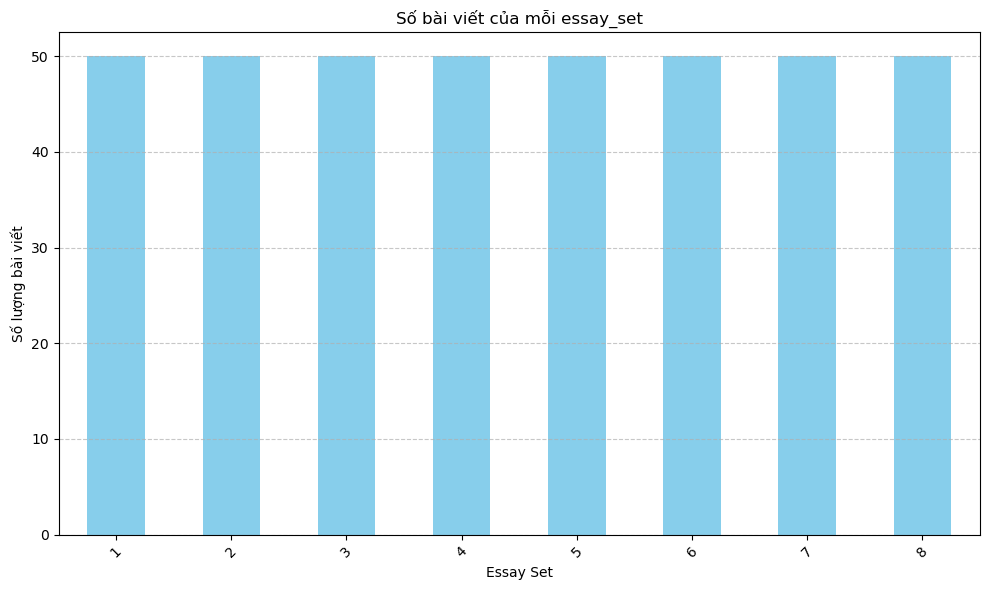

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

essay_set_counts = sampled_df['essay_set'].value_counts()

plt.figure(figsize=(10, 6))
essay_set_counts.plot(kind='bar', color='skyblue')
plt.title('Số bài viết của mỗi essay_set')
plt.xlabel('Essay Set')
plt.ylabel('Số lượng bài viết')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

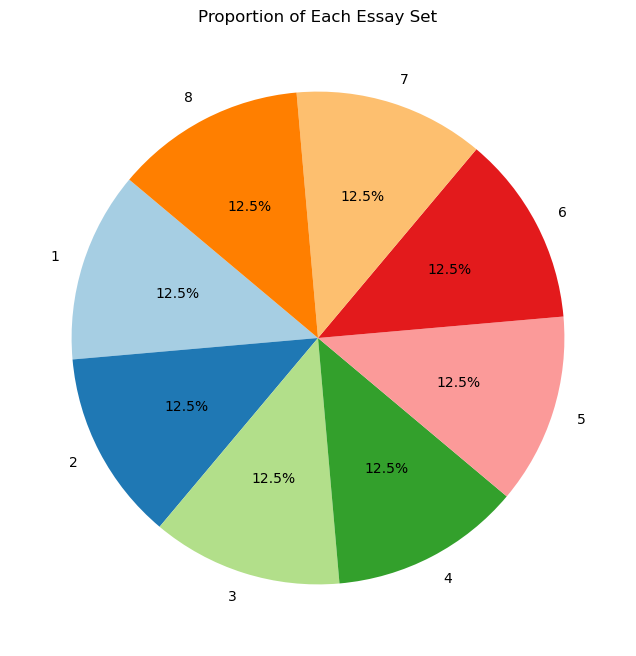

In [16]:
plt.figure(figsize=(8, 8))
essay_set_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Each Essay Set')
plt.ylabel('')
plt.show()

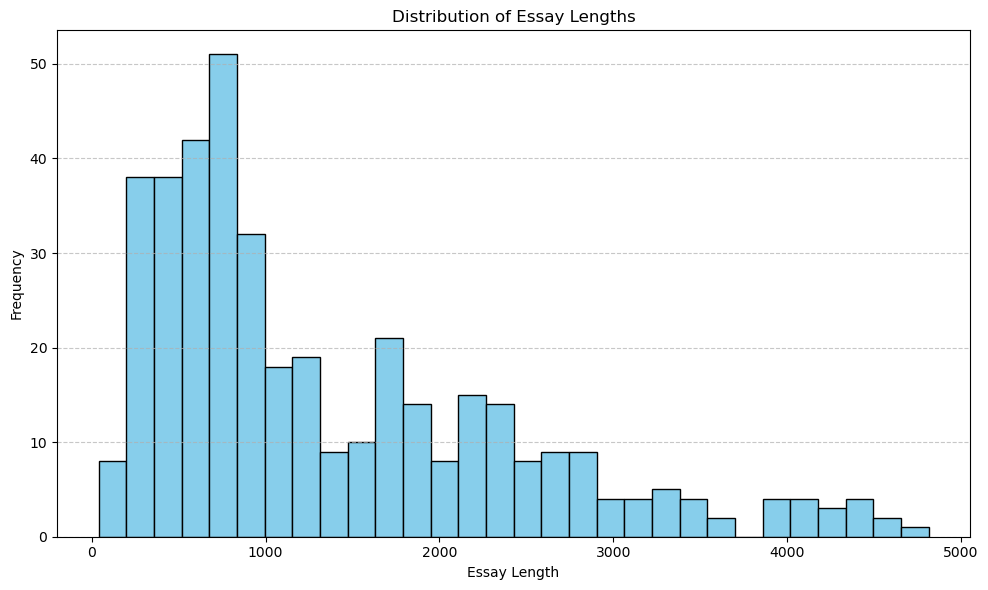

In [17]:
plt.figure(figsize=(10, 6))
sampled_df['essay_length'] = sampled_df['essay'].apply(len)  # Assuming 'essay' column contains text
sampled_df['essay_length'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Essay Lengths')
plt.xlabel('Essay Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

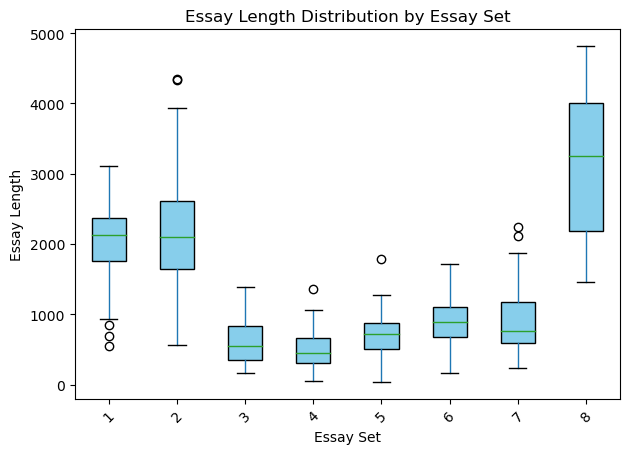

In [18]:
plt.figure(figsize=(12, 6))
sampled_df.boxplot(column='essay_length', by='essay_set', grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Essay Length Distribution by Essay Set')
plt.suptitle('')  # Suppress the default title to avoid redundancy
plt.xlabel('Essay Set')
plt.ylabel('Essay Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generating test data

In [13]:
sampled_df['prompt'].unique()[0]
sampled_df['prompt'].unique()[2]
sampled_df['prompt'].unique()[3]
sampled_df['prompt'].unique()[4]
sampled_df['prompt'].unique()[5]
sampled_df['prompt'].unique()[6]
sampled_df['prompt'].unique()[7]

'We all understand the benefits of laughter. For example, someone once said, “Laughter is the shortest distance between two people.” Many other people believe that laughter is an important part of any relationship. Tell a true story in which laughter was one element or part.'

In [14]:
data = {
    'essay_set': [1, 1, 1, 1, 1, 1, 1, 1],
    'essay': ["""Dear Editor,

In today's rapidly advancing world, computers have become an integral part of our daily lives, and I firmly believe that their impact on society is overwhelmingly positive. Computers enhance our hand-eye coordination through various interactive activities and games, fostering cognitive development in both children and adults. Moreover, they open up a world of information, enabling us to learn about different cultures, histories, and sciences from the comfort of our homes.

One of the most significant benefits of computers is their ability to connect us with people from faraway places. Through social media, video calls, and online forums, we can form meaningful relationships and exchange ideas with individuals from diverse backgrounds. This global interaction promotes understanding, tolerance, and cooperation among different cultures.

While it is true that excessive screen time can lead to a sedentary lifestyle, it is essential to strike a balance. Encouraging responsible computer usage, coupled with regular physical activity and outdoor experiences, can help mitigate these concerns. Rather than viewing computers as detrimental, we should embrace their potential to enrich our lives and bridge the gap between distant communities.

Sincerely,
[Your Name]""", """Dear Editor,

As computers become increasingly prevalent in our society, it is crucial to recognize the potential drawbacks of their excessive use. While technology undoubtedly offers numerous benefits, such as improved hand-eye coordination and access to vast information, we must also consider the negative impact on our physical and social well-being.

Spending excessive time on computers often leads to a sedentary lifestyle, which can result in various health issues, including obesity, cardiovascular diseases, and poor posture. Additionally, the allure of the digital world can distract us from engaging in outdoor activities, enjoying nature, and maintaining a healthy lifestyle.

Moreover, the overuse of computers can strain our relationships with family and friends. Face-to-face interactions are essential for building strong emotional connections, and relying solely on virtual communication can hinder our ability to develop deep, meaningful relationships.

In conclusion, while computers have their advantages, it is vital to use them in moderation. By balancing screen time with physical activities and real-world interactions, we can ensure that technology enhances rather than diminishes our quality of life.

Sincerely,
[Your Name]""", """Dear Editor,

The debate over the impact of computers on society is multifaceted, with valid arguments on both sides. As an advocate for balanced technology use, I believe that computers can be beneficial if used responsibly.

On one hand, computers have revolutionized the way we learn and communicate. They provide access to a wealth of knowledge and enable us to connect with people worldwide. These advancements have the potential to broaden our horizons and foster global understanding.

However, it is equally important to acknowledge the risks associated with excessive computer use. Prolonged screen time can lead to health issues and social isolation. Therefore, it is essential to strike a balance between digital engagement and real-world experiences.

Promoting responsible computer use involves setting time limits, encouraging physical activities, and prioritizing face-to-face interactions with family and friends. By adopting a balanced approach, we can harness the benefits of technology while minimizing its drawbacks.

Sincerely,
[Your Name]""", """Dear Editor,

The integration of computers into our daily lives has sparked a debate about their impact on society. As an advocate for educational technology, I believe that computers play a crucial role in enhancing our learning experiences.

Computers offer interactive and engaging educational tools that can improve hand-eye coordination and cognitive skills. They provide access to a vast array of resources, enabling students to explore new subjects and develop critical thinking abilities. Moreover, computers facilitate remote learning, making education accessible to individuals in remote or underserved areas.

While it is important to be mindful of screen time, we should focus on leveraging technology to support educational goals. By incorporating computers into our learning environments, we can prepare future generations for a rapidly evolving digital world.

Sincerely,
[Your Name]""", """Dear Editor,

In an era where technology is omnipresent, the role of computers in fostering social connectivity cannot be overstated. I firmly believe that computers have a positive impact on our ability to connect with others and build meaningful relationships.

Through social media platforms, video calls, and online forums, computers enable us to stay in touch with friends and family, regardless of geographical distances. These virtual connections are invaluable, especially in times of crisis or when physical interaction is not possible. Moreover, online communities provide a sense of belonging and support, helping individuals find like-minded people and form lasting bonds.

While it is important to balance virtual and face-to-face interactions, we should recognize the significant role computers play in enhancing our social lives. By embracing technology, we can strengthen our connections and create a more interconnected world.

Sincerely,
[Your Name]""", """Dear Editor,

As the use of computers becomes increasingly widespread, it is essential to address the potential health concerns associated with prolonged screen time. While technology offers numerous benefits, we must also consider its impact on our physical and mental well-being.

Extended periods of computer use can lead to various health issues, including eye strain, poor posture, and a sedentary lifestyle. These problems can have long-term consequences, such as chronic pain, obesity, and cardiovascular diseases. Additionally, excessive screen time can contribute to mental health issues, including anxiety and depression.

To mitigate these risks, it is crucial to promote healthy computer habits. Encouraging regular breaks, maintaining proper posture, and incorporating physical activities into our daily routines can help reduce the negative impact of prolonged computer use. By adopting a proactive approach, we can enjoy the benefits of technology while safeguarding our health.

Sincerely,
[Your Name]""", """Dear Editor,

In our increasingly digital world, the importance of digital literacy cannot be overstated. Computers have become essential tools for communication, education, and work, and I believe that fostering digital literacy is crucial for our society's progress.

Digital literacy encompasses a range of skills, from basic computer operation to advanced problem-solving abilities. By integrating computers into our education system, we can equip individuals with the knowledge and skills needed to navigate the digital landscape effectively. This, in turn, can enhance their employability and empower them to contribute meaningfully to our society.

While it is important to balance screen time with other activities, we should prioritize digital literacy as a key component of modern education. By doing so, we can ensure that future generations are well-prepared to thrive in an increasingly digital world.

Sincerely,
[Your Name]""", """Dear Editor,

The debate surrounding the impact of computers on society is complex, with valid points on both sides. As a proponent of responsible technology use, I believe that computers can be beneficial when used mindfully.

Computers offer numerous advantages, including improved hand-eye coordination, access to information, and the ability to connect with people globally. However, it is essential to recognize the potential drawbacks of excessive screen time, such as health issues and social isolation.

To maximize the benefits of technology while minimizing its negatives, we must promote responsible computer use. This involves setting limits on screen time, encouraging physical activities, and prioritizing face-to-face interactions. By adopting a balanced approach, we can leverage the positive aspects of computers while fostering a healthy, well-rounded lifestyle.

Sincerely,
[Your Name]"""]
}

test_df = pd.DataFrame(data)

test_df.to_csv('testing_set_1.csv', index=False)

data = {
    'essay_set': [2, 2, 2, 2, 2, 2, 2, 2],
    'essay': ["""Title: Preserving Intellectual Freedom: The Case Against Censorship in Libraries

In a society founded on principles of freedom and democracy, the presence of censorship in libraries is a contentious issue that strikes at the heart of intellectual liberty. As Katherine Paterson eloquently puts it, the right to remove materials deemed offensive sets a dangerous precedent, ultimately jeopardizing the diversity of thought and expression essential for a vibrant society. Thus, I vehemently oppose any form of censorship in libraries, be it books, music, movies, or magazines.

First and foremost, censorship undermines the very essence of a library – to serve as a repository of knowledge and ideas, accessible to all. By selectively removing materials based on subjective interpretations of offensiveness, we risk sanitizing our intellectual landscape and depriving individuals of the opportunity to engage with diverse perspectives. It is through encountering ideas that challenge our preconceptions that we foster critical thinking and intellectual growth.

Moreover, censorship in libraries is a slippery slope towards authoritarianism and the suppression of dissenting voices. History is replete with examples of regimes that sought to control information flow by censoring literature and art deemed subversive. To yield to the impulse of censorship is to pave the way for the erosion of fundamental freedoms, setting a dangerous precedent for future encroachments on individual liberties.

Furthermore, the notion of offensiveness is inherently subjective and varies greatly across individuals and communities. What one person finds objectionable, another may find enlightening or transformative. To impose one group's moral or cultural standards on an entire community is not only paternalistic but also antithetical to the principles of pluralism and tolerance.

Critics of unrestricted access to library materials often argue that certain content may be harmful, particularly to impressionable minds. While this concern is valid, it is essential to recognize that censorship is not the solution. Rather than shielding individuals from challenging or uncomfortable content, we should focus on promoting media literacy and critical thinking skills. By empowering individuals to critically evaluate information, we equip them to navigate a complex and often conflicting media landscape responsibly.

In conclusion, censorship in libraries poses a grave threat to intellectual freedom and the democratic principles upon which our society is built. Instead of succumbing to the impulse to censor, we must reaffirm our commitment to the principles of free speech and open inquiry. Only by embracing diverse perspectives and ideas can we truly enrich our understanding of the world and foster a more inclusive and democratic society.""", """Title: Defending Diversity: The Case Against Censorship in Libraries

In the ongoing debate surrounding censorship in libraries, it is imperative to uphold the principles of intellectual freedom and diversity of thought. As Katherine Paterson astutely observes, the right to remove materials considered offensive jeopardizes the very essence of a library as a bastion of knowledge and enlightenment. Thus, I staunchly oppose any attempts to censor books, music, movies, or other materials in libraries.

At the core of the argument against censorship lies the recognition that diversity of thought is essential for a thriving society. Libraries serve as invaluable repositories of knowledge and ideas, offering individuals the opportunity to explore a wide range of perspectives and worldviews. By censoring certain materials based on subjective notions of offensiveness, we risk stifling intellectual inquiry and depriving individuals of the opportunity to engage with challenging or controversial ideas.

Moreover, censorship in libraries is a form of intellectual paternalism that undermines individual autonomy and agency. By presuming to dictate what individuals can or cannot read, watch, or listen to, censors undermine the fundamental principle of freedom of choice. It is not the role of libraries or any other authority to shield individuals from ideas that some may find uncomfortable or objectionable.

Furthermore, censorship is inherently arbitrary and subjective, varying greatly across individuals and communities. What one person deems offensive, another may find enlightening or thought-provoking. To impose one group's moral or cultural standards on an entire community not only stifles diversity of thought but also perpetuates a climate of intolerance and censorship.

Critics of unrestricted access to library materials often argue that certain content may be harmful, particularly to young or impressionable minds. While this concern is valid, censorship is not the solution. Rather than banning or removing materials outright, we should focus on promoting media literacy and critical thinking skills. By equipping individuals with the tools to evaluate information critically, we empower them to make informed choices and navigate the complexities of the modern media landscape.

In conclusion, censorship in libraries undermines the principles of intellectual freedom and diversity of thought that are essential for a free and democratic society. Instead of succumbing to the impulse to censor, we must reaffirm our commitment to the principles of free speech and open inquiry. Only by embracing diverse perspectives and ideas can we truly enrich our understanding of the world and foster a more inclusive and democratic society.""", """Title: Embracing Enlightenment: Rejecting Censorship in Libraries

As Katherine Paterson so eloquently articulates, the specter of censorship in libraries threatens the very foundation of intellectual freedom and democracy. In today's increasingly polarized and contentious society, the debate over what materials should be accessible in libraries has taken center stage. However, I firmly believe that censorship has no place in libraries, as it undermines the principles of free expression and intellectual inquiry that are fundamental to a democratic society.

At its core, censorship in libraries is a form of intellectual repression that seeks to control what individuals can read, watch, or listen to. By removing materials deemed offensive or objectionable, censors undermine the autonomy and agency of individuals to explore diverse perspectives and ideas. This not only violates the principles of free speech but also stifles intellectual curiosity and growth.

Moreover, censorship in libraries perpetuates a climate of fear and self-censorship, where individuals are hesitant to engage with controversial or challenging ideas for fear of reprisal. This not only hampers intellectual discourse but also limits the exchange of ideas essential for a vibrant and democratic society. As the philosopher John Stuart Mill famously argued, the free exchange of ideas is essential for the discovery of truth and the advancement of knowledge.

Furthermore, the notion of offensiveness is inherently subjective and varies greatly across individuals and communities. What one person finds objectionable, another may find enlightening or transformative. To impose one group's moral or cultural standards on an entire community is not only authoritarian but also antithetical to the principles of pluralism and tolerance.

Critics of unrestricted access to library materials often cite concerns about the potential harm certain content may cause, particularly to young or impressionable minds. While this concern is valid, censorship is not the solution. Instead of banning or removing materials outright, we should focus on promoting media literacy and critical thinking skills. By empowering individuals to critically evaluate information, we equip them to navigate a complex and often conflicting media landscape responsibly.

In conclusion, censorship in libraries undermines the principles of intellectual freedom and diversity of thought that are essential for a free and democratic society. Instead of succumbing to the impulse to censor, we must reaffirm our commitment to the principles of free speech and open inquiry. Only by embracing diverse perspectives and ideas can we truly enrich our understanding of the world and foster a more inclusive and democratic society.""", """Title: Upholding Freedom: The Case Against Censorship in Libraries

In the ongoing discourse surrounding censorship in libraries, it is crucial to uphold the principles of intellectual freedom and diversity of expression. As Katherine Paterson poignantly asserts, the ability to remove materials deemed objectionable sets a dangerous precedent, threatening the very essence of a library as a repository of knowledge and ideas. Thus, I firmly oppose any form of censorship in libraries, including the removal of books, music, movies, or magazines.

Censorship in libraries not only infringes upon the fundamental right to access information but also stifles the exchange of ideas essential for a thriving democracy. By selectively removing materials based on subjective interpretations of offensiveness, censors undermine the autonomy of individuals to explore diverse perspectives and form their own opinions. This not only hampers intellectual growth but also perpetuates a climate of intellectual conformity and stagnation.

Moreover, censorship in libraries is a form of intellectual paternalism that undermines individual autonomy and agency. By presuming to dictate what individuals can or cannot read, watch, or listen to, censors infringe upon the fundamental principle of freedom of choice. It is not the role of libraries or any other authority to shield individuals from ideas that some may find uncomfortable or objectionable.

Furthermore, the notion of offensiveness is inherently subjective and varies greatly across individuals and communities. What one person deems offensive, another may find enlightening or thought-provoking. To impose one group's moral or cultural standards on an entire community not only stifles diversity of thought but also perpetuates a climate of intolerance and censorship.

Critics of unrestricted access to library materials often argue that certain content may be harmful, particularly to young or impressionable minds. While this concern is valid, censorship is not the solution. Instead of banning or removing materials outright, we should focus on promoting media literacy and critical thinking skills. By equipping individuals with the tools to evaluate information critically, we empower them to make informed choices and navigate the complexities of the modern media landscape.

In conclusion, censorship in libraries undermines the principles of intellectual freedom and diversity of thought that are essential for a free and democratic society. Instead of succumbing to the impulse to censor, we must reaffirm our commitment to the principles of free speech and open inquiry. Only by embracing diverse perspectives and ideas can we truly enrich our understanding of the world and foster a more inclusive and democratic society.""", """Title: Safeguarding Intellectual Freedom: Rejecting Censorship in Libraries

In the ongoing debate over censorship in libraries, it is imperative to defend the principles of intellectual freedom and open access to information. As Katherine Paterson astutely observes, the right to remove materials deemed offensive poses a grave threat to the diversity of thought and expression essential for a thriving democracy. Thus, I vehemently oppose any attempts to censor books, music, movies, or other materials in libraries.

At the heart of the argument against censorship lies the recognition that libraries serve as invaluable repositories of knowledge and ideas, accessible to all. By selectively removing materials based on subjective interpretations of offensiveness, we risk stifling intellectual inquiry and depriving individuals of the opportunity to engage with diverse perspectives. It is through encountering ideas that challenge our preconceptions that we foster critical thinking and intellectual growth.

Moreover, censorship in libraries is a form of intellectual repression that undermines individual autonomy and agency. By presuming to dictate what individuals can or cannot read, watch, or listen to, censors undermine the fundamental principle of freedom of choice. It is not the role of libraries or any other authority to shield individuals from ideas that some may find uncomfortable or objectionable.

Furthermore, the notion of offensiveness is inherently subjective and varies greatly across individuals and communities. What one person deems offensive, another may find enlightening or thought-provoking. To impose one group's moral or cultural standards on an entire community not only stifles diversity of thought but also perpetuates a climate of intolerance and censorship.

Critics of unrestricted access to library materials often argue that certain content may be harmful, particularly to young or impressionable minds. While this concern is valid, censorship is not the solution. Instead of banning or removing materials outright, we should focus on promoting media literacy and critical thinking skills. By empowering individuals to critically evaluate information, we equip them to navigate a complex and often conflicting media landscape responsibly.

In conclusion, censorship in libraries undermines the principles of intellectual freedom and diversity of thought that are essential for a free and democratic society. Instead of succumbing to the impulse to censor, we must reaffirm our commitment to the principles of free speech and open inquiry. Only by embracing diverse perspectives and ideas can we truly enrich our understanding of the world and foster a more inclusive and democratic society.""", """Title: Defending Liberty: The Case Against Censorship in Libraries

In the ongoing debate surrounding censorship in libraries, it is crucial to uphold the principles of intellectual freedom and diversity of expression. As Katherine Paterson eloquently argues, the right to remove materials deemed offensive threatens the very foundation of a democratic society. Thus, I strongly oppose any form of censorship in libraries, including the removal of books, music, movies, or magazines.

Censorship in libraries not only undermines the fundamental right to access information but also stifles the free exchange of ideas essential for a vibrant democracy. By selectively removing materials based on subjective interpretations of offensiveness, censors infringe upon individuals' autonomy to explore diverse perspectives and form their own opinions. This not only inhibits intellectual growth but also fosters a culture of intellectual conformity and stagnation.

Moreover, censorship in libraries represents a form of intellectual paternalism that undermines individual autonomy and agency. By presuming to dictate what individuals can or cannot read, watch, or listen to, censors infringe upon the fundamental principle of freedom of choice. It is not the role of libraries or any other authority to shield individuals from ideas that some may find uncomfortable or objectionable.

Furthermore, the notion of offensiveness is inherently subjective and varies greatly across individuals and communities. What one person deems offensive, another may find enlightening or thought-provoking. To impose one group's moral or cultural standards on an entire community not only stifles diversity of thought but also perpetuates a climate of intolerance and censorship.

Critics of unrestricted access to library materials often argue that certain content may be harmful, particularly to young or impressionable minds. While this concern is valid, censorship is not the solution. Instead of banning or removing materials outright, we should focus on promoting media literacy and critical thinking skills. By equipping individuals with the tools to evaluate information critically, we empower them to make informed choices and navigate the complexities of the modern media landscape.

In conclusion, censorship in libraries undermines the principles of intellectual freedom and diversity of thought that are essential for a free and democratic society. Instead of succumbing to the impulse to censor, we must reaffirm our commitment to the principles of free speech and open inquiry. Only by embracing diverse perspectives and ideas can we truly enrich our understanding of the world and foster a more inclusive and democratic society.""", """Title: Preserving Freedom of Expression: Rejecting Censorship in Libraries

In the ongoing debate surrounding censorship in libraries, it is crucial to uphold the principles of intellectual freedom and diversity of expression. As Katherine Paterson aptly asserts, the right to remove materials deemed offensive poses a serious threat to the free exchange of ideas and the autonomy of individuals. Thus, I firmly oppose any form of censorship in libraries, including the removal of books, music, movies, or magazines.

Censorship in libraries not only undermines the fundamental right to access information but also stifles the free exchange of ideas essential for a vibrant democracy. By selectively removing materials based on subjective interpretations of offensiveness, censors infringe upon individuals' autonomy to explore diverse perspectives and form their own opinions. This not only inhibits intellectual growth but also fosters a culture of intellectual conformity and stagnation.

Moreover, censorship in libraries represents a form of intellectual paternalism that undermines individual autonomy and agency. By presuming to dictate what individuals can or cannot read, watch, or listen to, censors infringe upon the fundamental principle of freedom of choice. It is not the role of libraries or any other authority to shield individuals from ideas that some may find uncomfortable or objectionable.

Furthermore, the notion of offensiveness is inherently subjective and varies greatly across individuals and communities. What one person deems offensive, another may find enlightening or thought-provoking. To impose one group's moral or cultural standards on an entire community not only stifles diversity of thought but also perpetuates a climate of intolerance and censorship.

Critics of unrestricted access to library materials often argue that certain content may be harmful, particularly to young or impressionable minds. While this concern is valid, censorship is not the solution. Instead of banning or removing materials outright, we should focus on promoting media literacy and critical thinking skills. By equipping individuals with the tools to evaluate information critically, we empower them to make informed choices and navigate the complexities of the modern media landscape.

In conclusion, censorship in libraries undermines the principles of intellectual freedom and diversity of thought that are essential for a free and democratic society. Instead of succumbing to the impulse to censor, we must reaffirm our commitment to the principles of free speech and open inquiry. Only by embracing diverse perspectives and ideas can we truly enrich our understanding of the world and foster a more inclusive and democratic society.""", """Title: Upholding Liberty: Rejecting Censorship in Libraries

As Katherine Paterson eloquently argues, the imposition of censorship in libraries poses a serious threat to intellectual freedom and the democratic principles upon which our society is built. In today's rapidly evolving media landscape, the debate over what materials should be accessible in libraries has become increasingly contentious. However, I firmly believe that censorship has no place in libraries, as it undermines the principles of free expression and intellectual inquiry that are fundamental to a democratic society.

At its core, censorship in libraries represents a form of intellectual repression that seeks to control what individuals can read, watch, or listen to. By selectively removing materials deemed offensive or objectionable, censors infringe upon the autonomy of individuals to explore diverse perspectives and form their own opinions. This not only undermines the principles of free speech but also stifles intellectual curiosity and growth.

Moreover, censorship in libraries perpetuates a culture of fear and self-censorship, where individuals are hesitant to engage with controversial or challenging ideas for fear of reprisal. This not only hampers intellectual discourse but also limits the exchange of ideas essential for a vibrant and democratic society. As the philosopher John Stuart Mill famously argued, the free exchange of ideas is essential for the discovery of truth and the advancement of knowledge.

Furthermore, the notion of offensiveness is inherently subjective and varies greatly across individuals and communities. What one person finds objectionable, another may find enlightening or transformative. To impose one group's moral or cultural standards on an entire community is not only authoritarian but also antithetical to the principles of pluralism and tolerance.

Critics of unrestricted access to library materials often cite concerns about the potential harm certain content may cause, particularly to young or impressionable minds. While this concern is valid, censorship is not the solution. Instead of banning or removing materials outright, we should focus on promoting media literacy and critical thinking skills. By empowering individuals to critically evaluate information, we equip them to navigate a complex and often conflicting media landscape responsibly.

In conclusion, censorship in libraries undermines the principles of intellectual freedom and diversity of thought that are essential for a free and democratic society. Instead of succumbing to the impulse to censor, we must reaffirm our commitment to the principles of free speech and open inquiry. Only by embracing diverse perspectives and ideas can we truly enrich our understanding of the world and foster a more inclusive and democratic society."""]
}

test_df = pd.DataFrame(data)

test_df.to_csv('testing_set_2.csv', index=False)

data = {
    'essay_set': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    'essay': ["""The Unforgiving Terrain

The features of the setting in Joe Kurmaskie's essay "Rough Road Ahead: Do Not Exceed Posted Speed Limit" have a profound impact on the cyclist, shaping his journey into one of unexpected trials and tribulations. The high deserts of California, with their arid conditions, take a significant toll on him. Initially, the cyclist is misled by the serene early-summer evening at the reservoir campground outside of Lodi, California. This tranquility is deceptive, as it masks the harsh reality awaiting him.

As he ventures deeper into the high deserts, the cyclist encounters ghost towns and dilapidated structures, such as the ramshackle shed and rusty pumps, which underscore the desolation of the region. The lack of reliable water sources, exemplified by the tarlike substance and brackish water from the rusted water pump, exacerbates his dehydration and desperation. The short, rolling hills replace the flat roads, introducing physical challenges that drain his energy further.

The changing terrain and signs warning of rough roads emphasize the cyclist's struggle. The speed limit sign reading 55 mph contrasts sharply with his water-depleting 12 mph, highlighting the grueling nature of his journey. The sight of tumbleweeds and a large snake adds to the sense of isolation and danger.

Ultimately, the abandoned Welch’s Grape Juice factory serves as a cruel irony, symbolizing the cyclist's shattered hopes. His final encounter at Gary and Wilber’s Fish Camp provides a momentary reprieve, but it underscores the importance of reliable navigation and the harshness of the setting he traversed.""", """The Deceptive Tranquility

The setting in Joe Kurmaskie's essay plays a crucial role in transforming a seemingly serene journey into a harrowing ordeal. The cyclist's adventure begins in the tranquil environment of a reservoir campground outside of Lodi, California. The early-summer evening and lively conversation with the old-timers create a false sense of security and ease. However, this tranquility is deceptive, leading the cyclist into a series of unexpected challenges.

As the cyclist follows the old-timers' advice, he ventures into a desolate landscape filled with ghost towns and abandoned structures. The first "town" he encounters is a ghost town, far from the thriving spot it might have once been. This sets the tone for the rest of his journey, characterized by isolation and a lack of resources.

The cyclist's struggle intensifies as he navigates the high deserts of California. The sun's relentless heat and the scarcity of water sources, such as the brackish water from the rusted pump, exacerbate his dehydration. The terrain shifts from flat roads to short, rolling hills, further depleting his energy and morale.

The warning sign of "ROUGH ROAD AHEAD: DO NOT EXCEED POSTED SPEED LIMIT" serves as a grim reminder of the challenging path ahead. The cyclist's slow pace of 12 mph contrasts starkly with the posted speed limit of 55 mph, emphasizing the difficulty of the journey. Encounters with tumbleweeds and a large snake add to the sense of danger and isolation.

The abandoned Welch’s Grape Juice factory symbolizes the cyclist's dashed hopes and the irony of his situation. Despite the harsh reality of the setting, the cyclist's perseverance and eventual discovery of Gary and Wilber’s Fish Camp highlight the resilience required to navigate such an unforgiving environment.""", """The Isolation and Desolation

The setting in "Rough Road Ahead: Do Not Exceed Posted Speed Limit" by Joe Kurmaskie profoundly affects the cyclist by immersing him in isolation and desolation. The journey begins with a deceptive sense of peace at the reservoir campground outside of Lodi, California. However, as the cyclist follows the old-timers' advice, he quickly finds himself in a barren, unforgiving landscape.

The first "town" he encounters is a ghost town, reflecting the area's decline and isolation. This sets the stage for the cyclist's journey through a desolate environment where resources are scarce. The lack of water sources becomes a critical issue, as evidenced by the brackish water from the rusted pump, which only exacerbates his dehydration.

The high deserts of California, with their intense heat and rolling hills, further isolate the cyclist. The warning sign of "ROUGH ROAD AHEAD: DO NOT EXCEED POSTED SPEED LIMIT" serves as a stark reminder of the challenges ahead. The cyclist's slow pace of 12 mph highlights the difficulty of navigating this terrain, contrasting sharply with the posted speed limit of 55 mph.

Encounters with tumbleweeds and a large snake add to the sense of danger and isolation. The abandoned Welch’s Grape Juice factory symbolizes the cyclist's dashed hopes and the irony of his situation. Despite the harsh reality of the setting, the cyclist's perseverance and eventual discovery of Gary and Wilber’s Fish Camp highlight the resilience required to navigate such an unforgiving environment.""", """The Harsh Realities of Nature

In Joe Kurmaskie's essay, the setting's harsh realities profoundly affect the cyclist's journey, transforming it from a leisurely ride into a test of endurance and survival. The initial setting at the reservoir campground outside of Lodi, California, provides a false sense of tranquility and ease. However, as the cyclist ventures deeper into the high deserts, the true nature of the setting reveals itself.

The cyclist's encounter with ghost towns and dilapidated structures underscores the desolation of the landscape. The lack of reliable water sources, such as the brackish water from the rusted pump, exacerbates his dehydration and desperation. The sun's relentless heat and the rolling hills replace the flat roads, further depleting his energy and morale.

The warning sign of "ROUGH ROAD AHEAD: DO NOT EXCEED POSTED SPEED LIMIT" serves as a grim reminder of the challenges ahead. The cyclist's slow pace of 12 mph contrasts sharply with the posted speed limit of 55 mph, highlighting the difficulty of the journey. Encounters with tumbleweeds and a large snake add to the sense of danger and isolation.

The abandoned Welch’s Grape Juice factory symbolizes the cyclist's dashed hopes and the irony of his situation. Despite the harsh reality of the setting, the cyclist's perseverance and eventual discovery of Gary and Wilber’s Fish Camp highlight the resilience required to navigate such an unforgiving environment.""", """The Journey Through Isolation

The setting in Joe Kurmaskie's essay significantly impacts the cyclist by immersing him in isolation and challenging his endurance. The journey begins with a deceptive sense of peace at the reservoir campground outside of Lodi, California. However, as the cyclist follows the old-timers' advice, he quickly finds himself in a barren, unforgiving landscape.

The first "town" he encounters is a ghost town, reflecting the area's decline and isolation. This sets the stage for the cyclist's journey through a desolate environment where resources are scarce. The lack of water sources becomes a critical issue, as evidenced by the brackish water from the rusted pump, which only exacerbates his dehydration.

The high deserts of California, with their intense heat and rolling hills, further isolate the cyclist. The warning sign of "ROUGH ROAD AHEAD: DO NOT EXCEED POSTED SPEED LIMIT" serves as a stark reminder of the challenges ahead. The cyclist's slow pace of 12 mph highlights the difficulty of navigating this terrain, contrasting sharply with the posted speed limit of 55 mph.

Encounters with tumbleweeds and a large snake add to the sense of danger and isolation. The abandoned Welch’s Grape Juice factory symbolizes the cyclist's dashed hopes and the irony of his situation. Despite the harsh reality of the setting, the cyclist's perseverance and eventual discovery of Gary and Wilber’s Fish Camp highlight the resilience required to navigate such an unforgiving environment.""", """The Irony of the Setting

The setting in Joe Kurmaskie's essay plays a crucial role in shaping the cyclist's journey, filled with irony and unexpected challenges. The initial setting at the reservoir campground outside of Lodi, California, provides a false sense of tranquility and ease. However, as the cyclist ventures deeper into the high deserts, the true nature of the setting reveals itself.

The cyclist's encounter with ghost towns and dilapidated structures underscores the desolation of the landscape. The lack of reliable water sources, such as the brackish water from the rusted pump, exacerbates his dehydration and desperation. The sun's relentless heat and the rolling hills replace the flat roads, further depleting his energy and morale.

The warning sign of "ROUGH ROAD AHEAD: DO NOT EXCEED POSTED SPEED LIMIT" serves as a grim reminder of the challenges ahead. The cyclist's slow pace of 12 mph contrasts sharply with the posted speed limit of 55 mph, highlighting the difficulty of the journey. Encounters with tumbleweeds and a large snake add to the sense of danger and isolation.

The abandoned Welch’s Grape Juice factory symbolizes the cyclist's dashed hopes and the irony of his situation. Despite the harsh reality of the setting, the cyclist's perseverance and eventual discovery of Gary and Wilber’s Fish Camp highlight the resilience required to navigate such an unforgiving environment.""", """The Deceptive Advice

The setting in Joe Kurmaskie's essay significantly impacts the cyclist by turning well-meaning advice into a perilous journey. The initial setting at the reservoir campground outside of Lodi, California, provides a false sense of tranquility and ease. However, as the cyclist follows the old-timers' advice, he quickly finds himself in a barren, unforgiving landscape.

The first "town" he encounters is a ghost town, reflecting the area's decline and isolation. This sets the stage for the cyclist's journey through a desolate environment where resources are scarce. The lack of water sources becomes a critical issue, as evidenced by the brackish water from the rusted pump, which only exacerbates his dehydration.
 with their intense heat and rolling hills, further isolate the cyclist. The warning sign of "ROUGH ROAD AHEAD: DO NOT EXCEED POSTED SPEED LIMIT" serves as a grim reminder of the challenges ahead. The cyclist's slow pace of 12 mph highlights the difficulty of navigating this terrain, contrasting sharply with the posted speed limit of 55 mph.

Encounters with tumbleweeds and a large snake add to the sense of danger and isolation. The abandoned Welch’s Grape Juice factory symbolizes the cyclist's dashed hopes and the irony of his situation. Despite the harsh reality of the setting, the cyclist's perseverance and eventual discovery of Gary and Wilber’s Fish Camp highlight the resilience required to navigate such an unforgiving environment.""", """The Psychological Toll

The setting in Joe Kurmaskie's essay takes a significant psychological toll on the cyclist, transforming a seemingly straightforward journey into a mental and physical challenge. The initial setting at the reservoir campground outside of Lodi, California, lulls the cyclist into a false sense of security. The early-summer evening and lively conversation with the old-timers create an ambiance of peace and relaxation.

However, as the cyclist ventures deeper into the high deserts, the true nature of the setting begins to weigh heavily on his mind. The desolation of ghost towns and abandoned structures, such as the ramshackle shed and rusty pumps, underscores the isolation and uncertainty of the journey. The lack of reliable water sources, exacerbated by the brackish water from the rusted pump, heightens his anxiety and desperation.

The changing terrain, from flat roads to rolling hills, and the relentless heat, further deplete his physical and mental strength. The warning sign of "ROUGH ROAD AHEAD: DO NOT EXCEED POSTED SPEED LIMIT" serves as a constant reminder of the challenges ahead, amplifying the psychological strain. The cyclist's slow pace of 12 mph, in stark contrast to the posted speed limit of 55 mph, underscores the grueling nature of the journey.

Encounters with tumbleweeds and a large snake add to the sense of danger and isolation, further heightening his psychological distress. The abandoned Welch’s Grape Juice factory symbolizes the cyclist's dashed hopes and the irony of his situation, exacerbating his mental fatigue.

Despite the psychological toll of the setting, the cyclist's perseverance and eventual discovery of Gary and Wilber’s Fish Camp underscore his resilience and determination to overcome the challenges posed by the unforgiving environment.""", """The Impact of Isolation on Resilience

The setting in Joe Kurmaskie's essay profoundly impacts the cyclist's resilience, testing his limits in an environment of isolation and desolation. The journey begins with a deceptive sense of peace at the reservoir campground outside of Lodi, California. The early-summer evening and lively conversation with the old-timers create a false sense of security.

As the cyclist follows the old-timers' advice, he quickly finds himself in a barren, unforgiving landscape. The first "town" he encounters is a ghost town, reflecting the area's decline and isolation. This sets the stage for the cyclist's journey through a desolate environment where resources are scarce.

The lack of water sources, such as the brackish water from the rusted pump, exacerbates his dehydration and desperation. The high deserts of California, with their intense heat and rolling hills, further isolate the cyclist. The warning sign of "ROUGH ROAD AHEAD: DO NOT EXCEED POSTED SPEED LIMIT" serves as a stark reminder of the challenges ahead. The cyclist's slow pace of 12 mph highlights the difficulty of navigating this terrain, contrasting sharply with the posted speed limit of 55 mph.

Encounters with tumbleweeds and a large snake add to the sense of danger and isolation. The abandoned Welch’s Grape Juice factory symbolizes the cyclist's dashed hopes and the irony of his situation. Despite the harsh reality of the setting, the cyclist's perseverance and eventual discovery of Gary and Wilber’s Fish Camp highlight the resilience required to navigate such an unforgiving environment.""", """The Irony of Misguided Advice

The setting in Joe Kurmaskie's essay serves as a backdrop for the irony of taking misguided advice, turning a seemingly straightforward journey into a perilous adventure. The initial setting at the reservoir campground outside of Lodi, California, provides a false sense of tranquility and ease. The early-summer evening and lively conversation with the old-timers create an ambiance of peace and relaxation.

However, as the cyclist ventures deeper into the high deserts, the true nature of the setting reveals itself. The first "town" he encounters is a ghost town, reflecting the area's decline and isolation. This sets the stage for the cyclist's journey through a desolate environment where resources are scarce. The lack of reliable water sources, such as the brackish water from the rusted pump, exacerbates his dehydration and desperation.

The high deserts of California, with their intense heat and rolling hills, further isolate the cyclist. The warning sign of "ROUGH ROAD AHEAD: DO NOT EXCEED POSTED SPEED LIMIT" serves as a stark reminder of the challenges ahead. The cyclist's slow pace of 12 mph highlights the difficulty of navigating this terrain, contrasting sharply with the posted speed limit of 55 mph.

Encounters with tumbleweeds and a large snake add to the sense of danger and isolation. The abandoned Welch’s Grape Juice factory symbolizes the cyclist's dashed hopes and the irony of his situation. Despite the harsh reality of the setting, the cyclist's perseverance and eventual discovery of Gary and Wilber’s Fish Camp highlight the resilience required to navigate such an unforgiving environment.

In conclusion, the setting in Joe Kurmaskie's "Rough Road Ahead: Do Not Exceed Posted Speed Limit" profoundly affects the cyclist, transforming his journey into a test of endurance, resilience, and survival. The deceptive tranquility of the reservoir campground contrasts sharply with the harsh realities of the high deserts, underscoring the importance of reliable navigation and the resilience required to overcome the challenges posed by an unforgiving environment."""]
}

test_df = pd.DataFrame(data)

test_df.to_csv('testing_set_3.csv', index=False)

data = {
    'essay_set': [4, 4, 4, 4, 4, 4, 4],
    'essay': ["""Finding Home Through Nature: A Reflection on "Winter Hibiscus"
The closing paragraph of "Winter Hibiscus" by Minfong Ho encapsulates Saeng's journey of adaptation and resilience in her new environment. Through her encounter with familiar plants from her childhood in Vietnam, Saeng reconnects with her roots and finds solace amidst the unfamiliarity of her new home in the United States. The hibiscus, dok Malik, and Madagascar periwinkle serve as tangible reminders of her past, evoking memories of her grandmother and the warmth of home.""", """Finding Home Through Nature: A Reflection on "Winter Hibiscus"
The closing paragraph of "Winter Hibiscus" by Minfong Ho encapsulates Saeng's journey of adaptation and resilience in her new environment. Through her encounter with familiar plants from her childhood in Vietnam, Saeng reconnects with her roots and finds solace amidst the unfamiliarity of her new home in the United States. The hibiscus, dok Malik, and Madagascar periwinkle serve as tangible reminders of her past, evoking memories of her grandmother and the warmth of home.""", """The Symbolism of Nature in "Winter Hibiscus"
In "Winter Hibiscus" by Minfong Ho, nature serves as a powerful symbol of connection and resilience for Saeng. As she encounters familiar plants from her homeland while walking home, Saeng experiences a deep sense of nostalgia and longing for her past life in Vietnam. The closing paragraph, where Saeng vows to try again in the spring, reflects her determination to embrace her new surroundings while holding onto memories of home.""", """Navigating Cultural Identity in "Winter Hibiscus"
In "Winter Hibiscus" by Minfong Ho, Saeng's encounter with familiar plants highlights the complexities of navigating cultural identity in a new environment. Despite feeling alienated and disconnected in the United States, Saeng finds solace and comfort in the presence of plants from her homeland. The closing paragraph, where Saeng resolves to retake her driver's test, symbolizes her determination to forge a sense of belonging while honoring her Vietnamese heritage.""", """The Journey of Adaptation in "Winter Hibiscus"
In "Winter Hibiscus" by Minfong Ho, Saeng's journey of adaptation is depicted through her encounter with familiar plants from her childhood in Vietnam. As she walks home after failing her driver's test, Saeng finds solace in the presence of the hibiscus and other plants at the florist shop. The closing paragraph, where Saeng vows to try again in the spring, signifies her resilience and determination to embrace her new life in the United States.s""", """The Power of Memory in "Winter Hibiscus"
In "Winter Hibiscus" by Minfong Ho, Saeng's encounter with familiar plants triggers memories of her past life in Vietnam, evoking a deep sense of nostalgia and longing. Despite the challenges of adjusting to her new environment in the United States, Saeng finds comfort in the familiarity of nature. The closing paragraph, where Saeng resolves to retake her driver's test, symbolizes her determination to overcome obstacles and embrace the future while holding onto cherished memories of home.""", """Hope and Renewal in "Winter Hibiscus"
In "Winter Hibiscus" by Minfong Ho, Saeng's vow to retake her driver's test in the spring symbolizes a message of hope and renewal. Despite the difficulties she faces in adapting to her new life in the United States, Saeng remains determined to persevere and overcome obstacles. The closing paragraph serves as a reminder of the resilience of the human spirit and the possibility of growth and transformation, even in the face of adversity."""]
}

test_df = pd.DataFrame(data)

test_df.to_csv('testing_set_4.csv', index=False)

data = {
    'essay_set': [5, 5, 5, 5, 5, 5, 5],
    'essay': ["""Nostalgic and Warm

The mood created by Narciso Rodriguez in his memoir is one of nostalgia and warmth. He reflects fondly on his childhood home, emphasizing the love, music, and culinary traditions that filled the air. The detailed descriptions of family gatherings and the close-knit community evoke a sense of longing for a simpler time filled with love and togetherness. For instance, he recalls, "Passionate Cuban music... filled the air, mixing with the aromas of the kitchen," underscoring the sensory richness of his memories.""", """Grateful and Reflective

The mood in Rodriguez's memoir is deeply grateful and reflective. He expresses profound appreciation for his parents' sacrifices and the lessons they imparted. His acknowledgment of their struggles and the warmth they created despite hardships highlights a reflective gratitude. He states, "There is no way to express my gratitude for the spirit of generosity impressed upon me at such an early age," showcasing his deep sense of thankfulness.""", """Celebratory and Joyous

Rodriguez's memoir exudes a celebratory and joyous mood. The vivid recounting of family celebrations, Cuban feasts, and the presence of extended family members creates an atmosphere of perpetual festivity. The kitchen, as the heart of his home, symbolizes joy and community. He describes the scene: "It was here where I learned the real definition of 'family,'" indicating the joyous essence of his upbringing.""", """Resilient and Hopeful

The mood is one of resilience and hope. Rodriguez's parents' journey from Cuba to the United States is marked by significant challenges, yet their perseverance and hope for a better future stand out. Their willingness to endure hardships for the sake of their children's futures imbues the narrative with a sense of enduring hope. He reflects, "The faith that this struggle would lead them and their children to better times drove them to endure these hard times," highlighting their resilient spirit.""", """Inclusive and Communal

The memoir conveys an inclusive and communal mood. Rodriguez's depiction of his neighborhood as a melting pot of different cultures coming together in solidarity showcases a strong sense of community. He writes, "In our neighborhood... all of these cultures came together in great solidarity and friendship," emphasizing the inclusivity and communal spirit that defined his early life.""", """Inclusive and Communal

The memoir conveys an inclusive and communal mood. Rodriguez's depiction of his neighborhood as a melting pot of different cultures coming together in solidarity showcases a strong sense of community. He writes, "In our neighborhood... all of these cultures came together in great solidarity and friendship," emphasizing the inclusivity and communal spirit that defined his early life.""", """Courageous and Determined

The mood is one of courage and determination. Rodriguez's parents' decision to leave Cuba and start anew in the United States required immense bravery and resolve. Their willingness to face cultural and financial challenges head-on is a testament to their determination. He admires their strength, stating, "What they did was a much more courageous thing than I could have ever done," highlighting their courageous spirit."""]
}

test_df = pd.DataFrame(data)

test_df.to_csv('testing_set_5.csv', index=False)

data = {
    'essay_set': [6, 6, 6, 6, 6, 6, 6, 6, 6],
    'essay': ["""The Race to the Sky: Empire State vs. Chrysler Building
Explore the intense rivalry between the Empire State Building and the Chrysler Building during their construction phases. Highlight how the architects of the Chrysler Building strategically added a spire to surpass the Empire State in height, prompting a response from the Empire State's team to further elevate its stature.""", """The Dream of Dirigibles: A Vision for the Empire State Building
Delve into the ambitious plan to incorporate a mooring mast atop the Empire State Building for docking dirigibles. Discuss the visionary idea of utilizing airships as a mode of transportation and how the architects intended to realize this dream through innovative design and engineering.""", """Engineering Marvels: Designing the Mooring Mast
Explore the intricate process of designing the mooring mast for the Empire State Building, considering the structural challenges and modifications required to integrate it seamlessly with the building's frame. Discuss the architectural vision behind the sleek, futuristic design of the mast.""", """The Empire's Beacon: Illuminating the Skies
Highlight the unique feature of the illuminated mooring mast and its significance as a beacon in the New York City skyline. Discuss how the lighting design contributed to the building's iconic status and served as a symbol of progress and innovation.""", """Facing Challenges: The Safety Concerns of Dirigible Docking
Examine the safety concerns surrounding the docking of dirigibles at the Empire State Building, particularly the risk posed by the flammability of hydrogen-filled airships. Discuss how the tragic Hindenburg disaster underscored the potential dangers of such a venture.""", """Battling the Elements: Overcoming Wind and Weather
Explore the engineering challenges posed by the unpredictable winds at the top of the Empire State Building, which rendered dirigible docking impractical. Discuss the efforts made to mitigate these challenges and ensure the safety of both airship passengers and city residents.

""", """Unforeseen Obstacles: Legal and Practical Hurdles
Discuss the legal and practical obstacles that ultimately thwarted the use of the mooring mast for dirigibles. Explore the existing laws prohibiting low-flying airships over urban areas and the logistical difficulties of safely mooring dirigibles amidst New York City's skyscrapers.""", """From Vision to Reality: The Rise and Fall of Dirigible Transportation
Trace the evolution of dirigible transportation from a promising vision of the future to a failed endeavor overshadowed by the rise of airplanes. Explore how technological advancements and safety concerns contributed to the demise of dirigibles as a viable mode of travel.""", """Legacy of Innovation: The Empire State Building's Transformation
Reflect on the legacy of innovation embodied by the Empire State Building, despite the unrealized vision of dirigible docking. Discuss how the building adapted to new uses, such as hosting a soda fountain and tea garden, and remained an enduring symbol of human ingenuity and achievement."""]
}

test_df = pd.DataFrame(data)

test_df.to_csv('testing_set_6.csv', index=False)

data = {
    'essay_set': [7, 7, 7, 7, 7, 7, 7, 7, 7],
    'essay': ["""The Silent Gardener

In the quiet village of Eldenwood, there lived a man named Thomas. Thomas was known for his garden, a vibrant tapestry of colors and scents that drew visitors from miles around. But what truly set Thomas apart was his patience. Every morning, he would spend hours tending to his plants, watering them gently, pruning them carefully, and speaking to them as if they were old friends. One particularly harsh winter, many of his prized flowers died. Instead of lamenting his loss, Thomas patiently waited for spring, nurturing the soil and planting new seeds. His patience paid off, and his garden bloomed more beautifully than ever, teaching the village the true meaning of resilience and calm persistence.""", """The Patient Teacher

Mrs. Anderson was a teacher at the local elementary school. She had a student named Jamie who struggled with reading. While other teachers had given up, Mrs. Anderson saw potential in Jamie. Every day after school, she would spend an extra hour with him, going over each word slowly and encouraging him to sound them out. It took months, but Jamie's reading improved. Mrs. Anderson’s patience not only helped Jamie academically but also instilled in him a lifelong love for learning. Her understanding and tolerance changed his life.""", """The Waiting Mother

Mina had a son, Eric, who was battling a severe illness. The treatments were long and exhausting, but Mina never complained. She stayed by Eric’s side through every hospital visit, every sleepless night, and every painful procedure. She smiled, comforted, and encouraged him, even when her own heart was breaking. Her patience and unwavering support gave Eric the strength to fight his illness. Years later, when Eric was finally declared healthy, he knew it was his mother’s patience that had carried him through the darkest times.
""", """The Patient Artist

Lila was an artist with a dream to have her work displayed in a prestigious gallery. She submitted her paintings to countless exhibitions and faced numerous rejections. Instead of giving up, Lila continued to hone her craft, spending hours perfecting each piece. Her patience and dedication finally paid off when a renowned gallery offered her a solo exhibition. The event was a huge success, and Lila’s story became an inspiration to aspiring artists everywhere, proving that patience and perseverance can turn dreams into reality.""", """The Patient Friend

Alex and Sam had been best friends since childhood. Sam had a tendency to make impulsive decisions, often landing himself in trouble. Alex, on the other hand, was patient and level-headed. When Sam lost his job and spiraled into a deep depression, Alex stood by him. He listened to Sam’s frustrations, offered support, and never judged him. It took time, but with Alex’s patience and understanding, Sam found a new job and got back on his feet. Their friendship grew stronger, demonstrating the power of patience and loyalty.""", """The Patient Learner

Emily had always struggled with math. She failed test after test, but she never gave up. Instead, she sought help from her teacher, attended extra classes, and spent countless hours practicing problems. Her classmates often teased her for her struggles, but Emily remained focused and determined. Her patience and hard work culminated in her finally passing her math exam with flying colors. Emily’s journey showed her peers that patience and dedication can overcome any obstacle.
""", """The Patient Lover

John and Sarah had been in a long-distance relationship for three years. The time apart was hard, filled with missed moments and longing. But John was patient. He understood that their careers were important and that the distance was temporary. He wrote letters, sent care packages, and made the most of their time together. Finally, the day came when they could be together permanently. John’s patience and understanding had kept their love strong, proving that true love can withstand any distance.""", """The Patient Coach

Coach Ramirez had a young soccer team with little experience. They lost every game in their first season, and the players’ spirits were low. But Coach Ramirez was patient. He focused on teaching them the fundamentals, encouraging teamwork, and building their confidence. He never yelled or showed frustration, even in the face of repeated losses. By the end of the second season, the team’s hard work and patience paid off when they won their first game. Coach Ramirez’s patience taught the players the importance of perseverance and sportsmanship.""", """The Patient Inventor

Clara was an inventor who had been working on a groundbreaking renewable energy device. She faced numerous setbacks, including failed prototypes and financial difficulties. Many advised her to abandon the project, but Clara’s patience and belief in her vision kept her going. She meticulously documented each failure, learning and improving with each attempt. After years of tireless work, Clara finally succeeded in creating a functional prototype. Her invention revolutionized the energy industry, and her story became a testament to the transformative power of patience and innovation."""]
}

test_df = pd.DataFrame(data)

test_df.to_csv('testing_set_7.csv', index=False)

data = {
    'essay_set': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
    'essay': ["""The Power of Laughter in Friendship
Explore a personal anecdote where shared laughter strengthened a friendship. Reflect on a memorable moment when a joke or humorous situation brought you and a friend closer together, emphasizing how laughter can bridge gaps and create lasting bonds.""", """A Family's Joy: Finding Humor in Everyday Life
Share a heartwarming story from your family life where laughter played a central role. Whether it was a funny mishap during a holiday gathering or a comical misunderstanding, illustrate how laughter became a cherished tradition that brought joy and unity to your family.""", """The Healing Power of Laughter
Narrate a true story where laughter served as a source of healing during a challenging time. Reflect on a moment of shared laughter that brought comfort and relief amidst adversity, highlighting the transformative effect of humor on emotional well-being.""", """Finding Love Through Laughter
Share a romantic story where laughter played a pivotal role in building a connection with your partner. Recount a memorable date or a humorous incident that brought you closer together, illustrating how laughter can ignite sparks and deepen intimacy in relationships.""", """Laughter in the Workplace: Fostering Team Spirit
Describe a workplace anecdote where laughter contributed to a positive team dynamic. Whether it was a lighthearted joke during a stressful meeting or a playful prank among colleagues, highlight how humor can improve morale and strengthen professional relationships.""", """The Joy of Parenthood: Laughing Through Parenthood
Reflect on a humorous experience from your journey as a parent. Share a funny parenting moment or a memorable blooper with your children, illustrating how laughter not only bonds families but also alleviates the challenges of raising kids.""", """Cultural Connections Through Comedy
Explore how humor transcends cultural barriers by sharing a story from a cross-cultural encounter. Describe a situation where laughter served as a universal language, fostering understanding and connection between people from different backgrounds.""", """Overcoming Adversity with Laughter
Narrate a story where laughter helped you overcome a personal challenge or setback. Reflect on a moment of levity that provided perspective and resilience during a difficult time, demonstrating how humor can be a powerful coping mechanism in the face of adversity.""", """The Laughter of Friendship: A Lifelong Bond
Share a nostalgic story from your childhood or adolescence where laughter formed the foundation of a lifelong friendship. Recall a humorous escapade or inside joke with a childhood friend, illustrating the enduring impact of shared laughter on friendship.""", """Laughter Across Generations: Connecting Through Humor
Reflect on an intergenerational experience where laughter bridged the gap between different age groups. Whether it was swapping jokes with grandparents or sharing funny stories with grandchildren, illustrate how humor can foster connections and mutual understanding across generations."""]}

test_df = pd.DataFrame(data)

test_df.to_csv('testing_set_8.csv', index=False)

# Concatenating multiple CSV files

In [15]:
# Đọc hai file CSV vào DataFrame
df1 = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/testing_set/testing_set_1.csv')
df2 = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/testing_set/testing_set_2.csv')
df3 = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/testing_set/testing_set_3.csv')
df4 = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/testing_set/testing_set_4.csv')
df5 = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/testing_set/testing_set_5.csv')
df6 = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/testing_set/testing_set_6.csv')
df7 = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/testing_set/testing_set_7.csv')
df8 = pd.read_csv('/Users/nobitad/Workspace/MyProject/Seminar/Datasets/testing_set/testing_set_8.csv')

# Nối các DataFrame lại với nhau
concatenated_testing_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])

# In ra DataFrame sau khi nối
print(concatenated_testing_df)

# Lưu DataFrame sau khi nối vào file CSV
concatenated_testing_df.to_csv('concatenated_file.csv', index=False)
concatenated_testing_df.info()

    essay_set                                              essay
0           1  Dear Editor,\n\nIn today's rapidly advancing w...
1           1  Dear Editor,\n\nAs computers become increasing...
2           1  Dear Editor,\n\nThe debate over the impact of ...
3           1  Dear Editor,\n\nThe integration of computers i...
4           1  Dear Editor,\n\nIn an era where technology is ...
..        ...                                                ...
5           8  The Joy of Parenthood: Laughing Through Parent...
6           8  Cultural Connections Through Comedy\nExplore h...
7           8  Overcoming Adversity with Laughter\nNarrate a ...
8           8  The Laughter of Friendship: A Lifelong Bond\nS...
9           8  Laughter Across Generations: Connecting Throug...

[68 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   essay_set  68 non-